# Part 1 - Machine Learning

Task 1.1 Data preperation

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('AlgerianFF_Region1.csv')
print (df1)

     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
117   26      9  2012           31   54   11    0.0  82.0  6.0  16.3  2.5   
118   27      9  2012           31   66   11    0.0  85.7  8.3  24.9  4.0   
119   28      9  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29      9  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   

     BUI  FWI  
0    3.4  0.5  
1    3.9  0.4  
2    2.7  0.1  
3    1.7  0

Splitting data for dataset into inputs & targets for Dataset 1

In [2]:
df1_inputs = df1.values[:,:-1].astype(float)
df1_targets = df1.values[:,-1].astype(float)
print(df1_inputs, df1_targets)

[[1.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.300e+00 3.400e+00]
 [2.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.000e+00 3.900e+00]
 [3.000e+00 6.000e+00 2.012e+03 ... 7.100e+00 3.000e-01 2.700e+00]
 ...
 [2.800e+01 9.000e+00 2.012e+03 ... 8.800e+00 1.800e+00 6.800e+00]
 [2.900e+01 9.000e+00 2.012e+03 ... 7.700e+00 3.000e-01 3.000e+00]
 [3.000e+01 9.000e+00 2.012e+03 ... 7.500e+00 2.000e-01 2.400e+00]] [ 0.5  0.4  0.1  0.   0.5  2.5  7.2  7.1  0.3  0.9  5.6  7.1  0.2  0.4
  0.1  0.   0.   0.2  1.4  0.4  2.2  2.3  3.8  7.5  8.4 10.6 15.  13.9
  3.9 12.9  0.4  0.3  0.5  1.7  4.9  6.8  3.2  8.   0.6  0.5  2.2  0.9
  3.4  0.8  0.5  0.4  3.6  6.  10.9  4.   8.8  2.8  2.1  1.3  7.3 15.3
 15.3 11.3 11.9 10.7 15.7  0.9  0.8  0.8  3.9  6.1  6.8  8.   2.6  9.9
 11.6 12.1  4.2 10.2 10.6  6.3  4.2 14.6 16.1 17.2 16.8 18.4 20.4 22.3
 20.9 20.3 13.7 13.2 19.9 30.2  4.2  0.3  0.1  0.   0.   0.5  1.7  0.9
  0.6  0.4  0.2  0.3  0.3  0.5  0.   0.1  0.   0.8  5.9  7.7  9.7  6.3
  8.3  2.8  0.7  0.7  0.

In [3]:
import pandas as pd
df2 = pd.read_csv ('AlgerianFF_Region2.csv')
print (df2)

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           32   71   12    0.7  57.1   2.5   8.2  0.6   
1      2      6  2012           30   73   13    4.0  55.7   2.7   7.8  0.6   
2      3      6  2012           29   80   14    2.0  48.7   2.2   7.6  0.3   
3      4      6  2012           30   64   14    0.0  79.4   5.2  15.4  2.2   
4      5      6  2012           32   60   14    0.2  77.1   6.0  17.6  1.8   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
117   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
118   27      9  2012           28   87   15    4.4  41.1   6.5   8.0  0.1   
119   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
120   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
121   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  
0     2.8  0.2  
1     2.9  0.2  
2     2.6  0

Splitting data for dataset into inputs & targets for Dataset 2

In [4]:
df2_inputs = df2.values[:,:-1].astype(float)
df2_targets = df2.values[:,-1].astype(float)
print(df1_inputs, df1_targets)

[[1.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.300e+00 3.400e+00]
 [2.000e+00 6.000e+00 2.012e+03 ... 7.600e+00 1.000e+00 3.900e+00]
 [3.000e+00 6.000e+00 2.012e+03 ... 7.100e+00 3.000e-01 2.700e+00]
 ...
 [2.800e+01 9.000e+00 2.012e+03 ... 8.800e+00 1.800e+00 6.800e+00]
 [2.900e+01 9.000e+00 2.012e+03 ... 7.700e+00 3.000e-01 3.000e+00]
 [3.000e+01 9.000e+00 2.012e+03 ... 7.500e+00 2.000e-01 2.400e+00]] [ 0.5  0.4  0.1  0.   0.5  2.5  7.2  7.1  0.3  0.9  5.6  7.1  0.2  0.4
  0.1  0.   0.   0.2  1.4  0.4  2.2  2.3  3.8  7.5  8.4 10.6 15.  13.9
  3.9 12.9  0.4  0.3  0.5  1.7  4.9  6.8  3.2  8.   0.6  0.5  2.2  0.9
  3.4  0.8  0.5  0.4  3.6  6.  10.9  4.   8.8  2.8  2.1  1.3  7.3 15.3
 15.3 11.3 11.9 10.7 15.7  0.9  0.8  0.8  3.9  6.1  6.8  8.   2.6  9.9
 11.6 12.1  4.2 10.2 10.6  6.3  4.2 14.6 16.1 17.2 16.8 18.4 20.4 22.3
 20.9 20.3 13.7 13.2 19.9 30.2  4.2  0.3  0.1  0.   0.   0.5  1.7  0.9
  0.6  0.4  0.2  0.3  0.3  0.5  0.   0.1  0.   0.8  5.9  7.7  9.7  6.3
  8.3  2.8  0.7  0.7  0.

Noramlization

In [5]:
from sklearn import preprocessing

df1_inputs = preprocessing.normalize(df1_inputs)
print(df1_inputs)

[[4.96475491e-04 2.97885295e-03 9.98908688e-01 ... 3.77321373e-03
  6.45418138e-04 1.68801667e-03]
 [9.92931309e-04 2.97879393e-03 9.98888896e-01 ... 3.77313897e-03
  4.96465654e-04 1.93621605e-03]
 [1.48914515e-03 2.97829030e-03 9.98720015e-01 ... 3.52431019e-03
  1.48914515e-04 1.34023064e-03]
 ...
 [1.38985254e-02 4.46738316e-03 9.98708325e-01 ... 4.36810798e-03
  8.93476633e-04 3.37535617e-03]
 [1.43947191e-02 4.46732663e-03 9.98695687e-01 ... 3.82204612e-03
  1.48910888e-04 1.48910888e-03]
 [1.48921935e-02 4.46765806e-03 9.98769781e-01 ... 3.72304839e-03
  9.92812903e-05 1.19137548e-03]]


In [6]:
df2_inputs = preprocessing.normalize(df2_inputs)
print(df1_inputs)

[[4.96475491e-04 2.97885295e-03 9.98908688e-01 ... 3.77321373e-03
  6.45418138e-04 1.68801667e-03]
 [9.92931309e-04 2.97879393e-03 9.98888896e-01 ... 3.77313897e-03
  4.96465654e-04 1.93621605e-03]
 [1.48914515e-03 2.97829030e-03 9.98720015e-01 ... 3.52431019e-03
  1.48914515e-04 1.34023064e-03]
 ...
 [1.38985254e-02 4.46738316e-03 9.98708325e-01 ... 4.36810798e-03
  8.93476633e-04 3.37535617e-03]
 [1.43947191e-02 4.46732663e-03 9.98695687e-01 ... 3.82204612e-03
  1.48910888e-04 1.48910888e-03]
 [1.48921935e-02 4.46765806e-03 9.98769781e-01 ... 3.72304839e-03
  9.92812903e-05 1.19137548e-03]]


Task 1.2 Regression 

In [7]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

a) Creation of regression tool for MLPRegressor

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [9]:
regressor1 = MLPRegressor(solver='lbfgs', max_iter=4000)
regressor1.fit(df1, df1_targets)
outputs = regressor1.predict(df1)
print("Mean absolute error: ", mean_absolute_error(df1_targets, outputs))

#calculate MAE
REG1_mae = abs(cross_val_score(regressor1, df1_inputs, df1_targets, scoring="neg_mean_absolute_error"))

Mean absolute error:  0.15374615377186412


b) Creation of regression tool for SVR

In [10]:
SVRregressor = SVR()
SVRregressor.fit(df1_inputs, df1_targets)
SVRoutputs = SVRregressor.predict(df1_inputs)

print("Mean absolute error: ", mean_absolute_error(df1_targets, SVRoutputs))

#calculate MAE
RFreg_mae = abs(cross_val_score(SVRregressor, df1_inputs, df1_targets, scoring="neg_mean_absolute_error")) 

Mean absolute error:  4.718814250011162


c) Creation of regressor tool for RandomForestRegressor

In [11]:
RandFor_Regressor = RandomForestRegressor()
RandFor_Regressor.fit(df1_inputs, df1_targets)
outputs =  RandFor_Regressor.predict(df1_inputs)

print("Mean absolute error: ", mean_absolute_error(df1_targets, outputs))

#calculate MAE
RandREG_mae = abs(cross_val_score(RandFor_Regressor, df1_inputs, df1_targets, scoring="neg_mean_absolute_error"))

Mean absolute error:  0.2682459016393433


Task 1.3 Assessment of regression

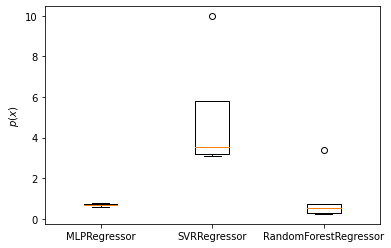

In [12]:
# store mae results into a python array 
import matplotlib.pyplot as plt

maeArray = [REG1_mae, RFreg_mae, RandREG_mae]

REG1 = np.random.rand(100)
REG2 = np.random.randn(100)
REG3 = np.random.rand(100)

plt.figure()
plt.boxplot([REG1_mae, RFreg_mae, RandREG_mae])
plt.xticks([1,2,3], ["MLPRegressor", "SVRRegressor", "RandomForestRegressor"]);
plt.ylabel("$p(x)$")
plt.savefig("boxplot.png", bbox_inches="tight")
plt.show()

# PART 2 – EVOLUTIONARY COMPUTATION

Task 2.1 –Generation of random solutions

In [13]:
distances = pd.read_csv(r'distances.csv', header=None)
print (distances)

       0      1      2      3      4    5    6      7    8      9      10  \
0     0.0   41.2  180.0  392.0  394.0  547  525  151.0  152   53.0  134.0   
1    41.2    0.0  157.0  428.0  430.0  583  560  187.0  187   92.1  169.0   
2   180.0  157.0    0.0  295.0  297.0  451  428  266.0  347  233.0  291.0   
3   392.0  428.0  295.0    0.0   46.5  168  145  414.0  485  372.0  429.0   
4   394.0  430.0  297.0   46.5    0.0  156  127  403.0  487  373.0  431.0   
5   547.0  583.0  451.0  168.0  156.0    0  104  561.0  641  528.0  585.0   
6   525.0  560.0  428.0  145.0  127.0  104    0  539.0  620  506.0  563.0   
7   151.0  187.0  266.0  414.0  403.0  561  539    0.0  215  118.0   80.1   
8   152.0  187.0  347.0  485.0  487.0  641  620  215.0    0  121.0  152.0   
9    53.0   92.1  233.0  372.0  373.0  528  506  118.0  121    0.0  101.0   
10  134.0  169.0  291.0  429.0  431.0  585  563   80.1  152  101.0    0.0   
11  266.0  302.0  307.0  376.0  373.0  533  510  118.0  359  246.0  202.0   

In [14]:
cities = open(r'cities.txt')
test = cities.read().splitlines()
print(test)

['Cardiff', 'Swansea', 'Bangor', 'Glasgow', 'Edinburgh', 'Inverness', 'Aberdeen', 'London', 'Plymouth', 'Bristol', 'Southampton', 'Norwich', 'Birmingham', 'Manchester', 'Liverpool', 'Cambridge', 'Brighton', 'Oxford', 'Newcastle', 'Leeds']


In [15]:
import random
# dislaying distances

def randRoute(distances):
    route = list(range(len(distances)))
    #shuffeling cities
    random.shuffle(route)
    return route
print(randRoute(distances)) # creating a random route


#working out length of route

def route_length(route, dist):
    length = 0 #sets the varaible 'length' to zero
    for i in range(len(route)): # looks through the array
       length += dist.iat[route[i-1], route[i]] # for how many cities are in the route, get distance of first city and next city
    
    return length

x = randRoute(distances)
y = route_length(x, distances)
print(x)
print(y)
#x = randRoute(distances)
#print (x)
#y = route_length(x, distances)
#print(y)

[16, 1, 6, 9, 17, 15, 18, 3, 12, 4, 19, 10, 5, 2, 7, 14, 13, 11, 0, 8]
[2, 1, 18, 15, 17, 0, 10, 9, 6, 7, 5, 11, 8, 4, 3, 13, 19, 12, 14, 16]
5289.5


Task 2.2 –Algorithm implementation 

2.2.1 - Creation of Ruin and Recreate function

In [16]:
def ruinAndRecreate(iterations):
    bestRoute = randRoute(distances)
    bestRouteLength = route_length(bestRoute, distances)
    
    for i in range(iterations):
        route2 = randRoute(distances)
        print(route2)
        routelength2 = route_length(route2, distances)
        if routelength2 < bestRouteLength:
            bestRouteLength = routelength2
            bestRoute = route2
    return bestRoute
print(ruinAndRecreate(30))

[5, 19, 1, 12, 10, 9, 2, 16, 14, 11, 0, 18, 17, 6, 8, 13, 3, 15, 7, 4]
[1, 14, 19, 2, 11, 0, 17, 18, 7, 12, 15, 13, 8, 5, 16, 4, 3, 9, 6, 10]
[10, 7, 16, 14, 5, 17, 9, 13, 4, 0, 15, 19, 3, 2, 6, 1, 12, 8, 18, 11]
[6, 18, 10, 16, 7, 4, 8, 5, 9, 2, 14, 19, 11, 3, 15, 1, 12, 0, 17, 13]
[3, 0, 13, 1, 4, 14, 12, 2, 18, 17, 9, 6, 11, 8, 19, 15, 16, 5, 10, 7]
[14, 19, 2, 12, 10, 7, 1, 18, 17, 16, 13, 11, 6, 9, 0, 4, 15, 3, 5, 8]
[12, 7, 9, 13, 8, 14, 19, 17, 0, 16, 18, 10, 15, 2, 1, 11, 5, 3, 6, 4]
[4, 6, 14, 11, 0, 15, 17, 1, 3, 16, 13, 8, 10, 12, 9, 5, 7, 18, 2, 19]
[6, 10, 12, 7, 13, 0, 18, 15, 16, 14, 3, 1, 5, 9, 17, 4, 11, 2, 8, 19]
[10, 13, 3, 6, 9, 18, 12, 19, 4, 15, 1, 8, 7, 11, 0, 2, 14, 17, 5, 16]
[18, 19, 16, 5, 3, 1, 9, 7, 17, 2, 14, 12, 13, 15, 4, 11, 0, 8, 6, 10]
[4, 18, 1, 9, 10, 13, 0, 8, 6, 17, 14, 2, 5, 12, 3, 16, 7, 19, 15, 11]
[14, 5, 7, 4, 17, 9, 0, 11, 8, 6, 3, 18, 1, 10, 2, 13, 16, 19, 15, 12]
[14, 9, 12, 17, 5, 2, 13, 11, 6, 0, 1, 10, 4, 3, 18, 7, 19, 8, 16, 15]
[4, 19

2.2.1 - Creation of swap function

In [32]:
def swap(iterations):
    print("swap Function") # for readability
    
    bestRoute = randRoute(distances)
    bestRouteLength = route_length(bestRoute, distances)
    
    for i in range(iterations):
        newRoute = bestRoute.copy() # copies the values of bestRoute
        newRouteLength = route_length(newRoute, distances) #records the length of the new route, and gives something to compare what route is more fitter out of the bestroute and newroute
        
        print("Best route = ", bestRoute, ": Length = ", bestRouteLength) # make sure it works
        
        newRoutePosition1 = random.randint(0, max(newRoute))
        newRoutePosition2 = random.randint(0, max(newRoute))
        
        
        newRoute[newRoutePosition1], newRoute[newRoutePosition2] = newRoute[newRoutePosition2], newRoute[newRoutePosition1]
        print("New Route = ", newRoute, ": Length = ", newRouteLength)
        newRouteLength = route_length(newRoute, distances)
        
        if(bestRouteLength > newRouteLength):
            bestRoute = newRoute
            bestRouteLength = newRouteLength
        else:
            bestRoute = bestRoute
            bestRouteLength = bestRouteLength
        print("Best Route = ", bestRoute, ": Length = ", bestRouteLength)
        
    print("Best Route = ", route_length(bestRoute, distances))
    
    return bestRoute

print(swap(30))

swap Function
Best route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
New Route =  [4, 0, 5, 12, 17, 14, 1, 15, 6, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
Best Route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
Best route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
New Route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 18, 9, 19, 2, 11, 16, 10, 13, 7] : Length =  5413.4
Best Route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
Best route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
New Route =  [6, 0, 5, 12, 1, 14, 17, 15, 4, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
Best Route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 18, 2, 19, 9, 11, 16, 10, 13, 7] : Length =  5413.4
Best route =  [4, 0, 5, 12, 1, 14, 17, 15, 6, 3, 8, 1